# Credit Card Fraud Detection

The purpose of this project is to build a machine learning model capable of detecting fraudulent transactions. It is also necessary to devise methods to handle class imbalances present in any data set, along with model selection and hyperparameter tuning. 

In [2]:
# Importing the necessary packages 

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Preprocessing and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Scaling
from sklearn.preprocessing import StandardScaler

#Test train split
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#Skewness rectificatin with power transform
from sklearn.preprocessing import PowerTransformer

#Cross validation and Hyperparameter tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

#Model Building - Logistic Regression,Decision Tree,Random Forest & XGBoost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Metrics for evaluation
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score, average_precision_score
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Sampling for imbalance mitigation
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from collections import Counter

## Exploratory data analysis

In [3]:
#Load the dataset

df = pd.read_csv(r'C:\Users\Ramanujam SESHADRI\Downloads\310_23498_bundle_archive\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The features of the dataset is PCA transformed so as to ensure the privacy of the data except for columns ' Time',;Amount' and 'Class'

In [4]:
#observe the different feature type present in the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#Size of the dataset
df.shape

(284807, 31)

There are 2,84,807 rows of data with 31 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Dealing with missing data
df.isnull().sum().max()

0

From above, it can be clearly seen that there are no missing values in the columns and the columns seem to be of the desired data type.

Next let's observe the distribution of our classes so as to find the extent of imbalance in the data.

In [8]:
#Count the individual values of 0's and 1's in the class variable and calculate the percent distribution

classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print("Percent of valid txns : {}\nPercent of fraud txns :{}".format(round(normal_share,2), round(fraud_share,2)))

Percent of valid txns : 99.83
Percent of fraud txns :0.17


In [9]:
#Count of class values
classes.head()

0    284315
1       492
Name: Class, dtype: int64

Lets examine the outliers , if any.

Number of outliers below the lower bound:  0  (0.0%)
Number of outliers above the upper bound:  31904  (11.2%)


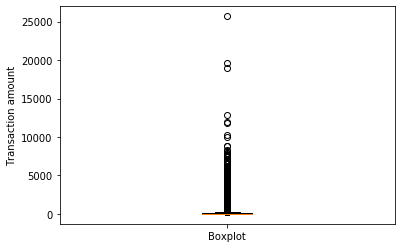

In [10]:
plt.boxplot(df['Amount'], labels = ['Boxplot'])
plt.ylabel('Transaction amount')
plt.plot()

amount = df[['Amount']].sort_values(by='Amount')
q1, q3 = np.percentile(amount,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print('Number of outliers below the lower bound: ', amount[amount['Amount'] < lower_bound].count()[0],
     ' ({:.4}%)'.format(amount[amount['Amount'] < lower_bound].count()[0] / amount['Amount'].count() * 100))
print('Number of outliers above the upper bound: ', amount[amount['Amount'] > upper_bound].count()[0],
      ' ({:.4}%)'.format(amount[amount['Amount'] > upper_bound].count()[0] / amount['Amount'].count() * 100))

The interquartile range method found 31904 outliers, which represents 11.2% of the observations. Removing them from the dataset would be a bad idea due to the loss of a large amount of information for the machine learning models. Also since the skewness of the data is to be dealt with power transform, this will be mitigated there.

For better interpretation , lets visualize the distribution of fraud and valid transactions with a bar plot.

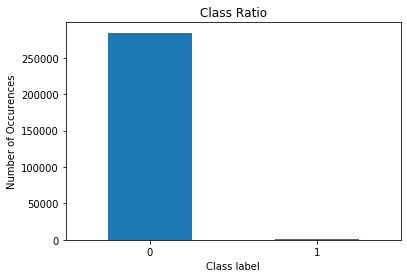

In [11]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.xlabel("Class label")
plt.ylabel("Number of Occurences")
classes.plot(kind = 'bar',title = 'Class Ratio',rot=0)


Now we can examine the relation between the class variable and the time and Amount variables to see the relevance of the same.

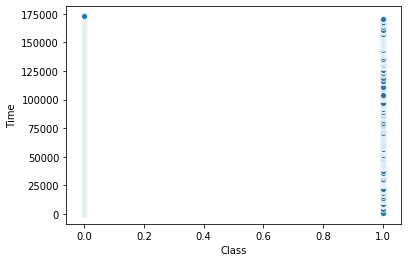

In [12]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x = df['Class'] , y = df['Time'])

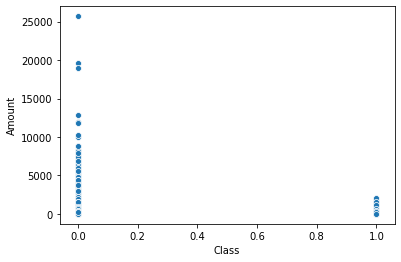

In [13]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x = df['Class'] , y = df['Amount'])

From the above plots, the time variable seems to have negligent effect on the class. So it may be dropped.

In [14]:
# Drop unnecessary columns
df = df.drop(['Time'], axis=1)

### Splitting the data into train & test data

First Split the set into X and Y variables.

In [15]:
y= df['Class'] #class variable
X = df.drop(['Class'], axis=1)

Now,the dataset is to be split in 70:30 ratio into test and train.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

Since data is imbalanced, the train test split is stratified so, the class ratio is considered while splitting the data into train and test sets.

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [17]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

Skewness in data can affect the model performance. So this needs to be found and mitigated.

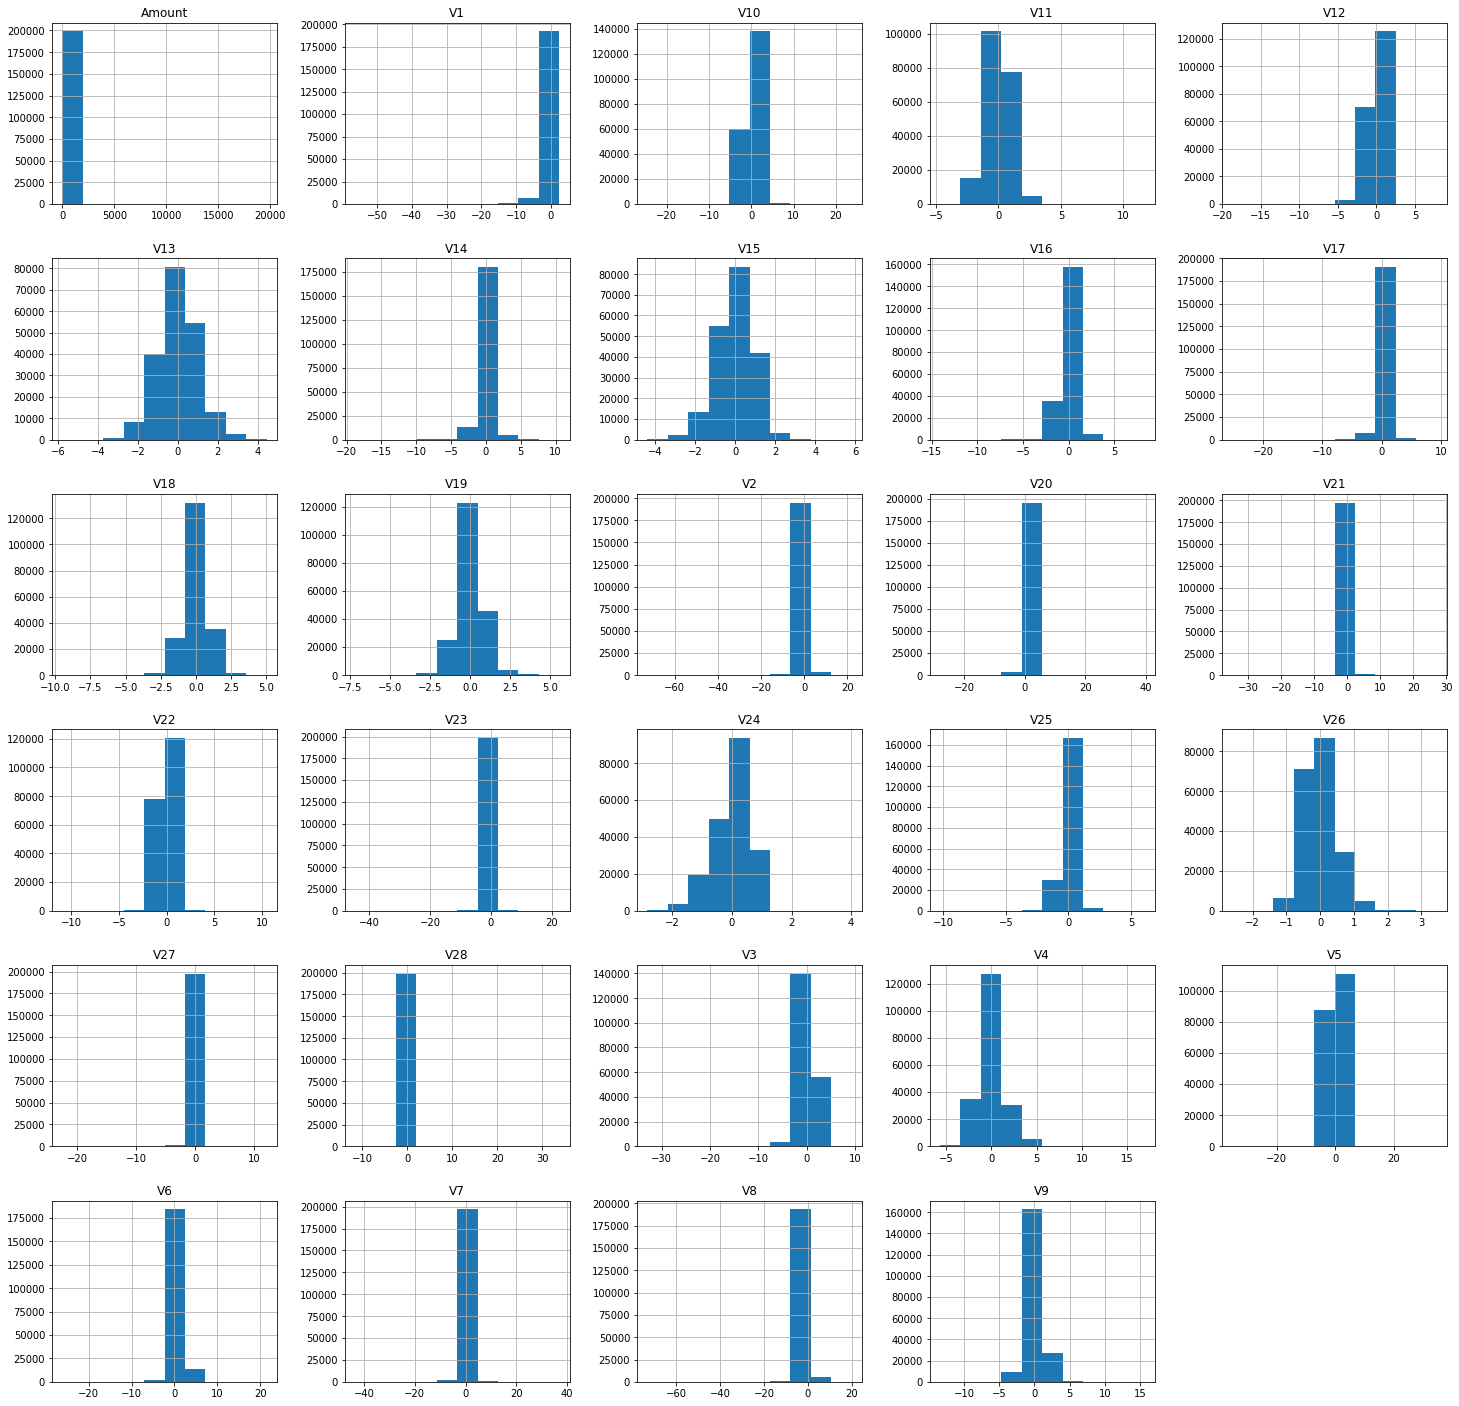

In [18]:
#Plotting a histogram to examine skewness
X_train.hist(figsize = (25,25))
plt.show()

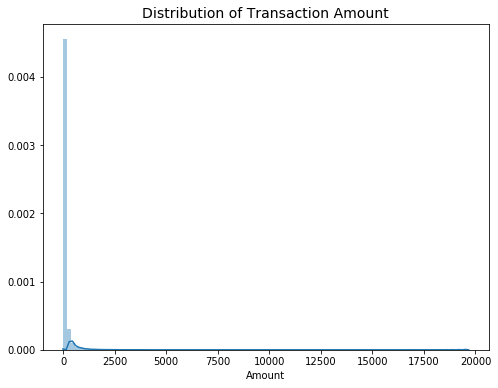

In [19]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Amount', fontsize=14)
sns.distplot(X_train['Amount'], bins=100)
plt.show()

In [20]:
#Skewness in numerical value.
X_train['Amount'].skew()

15.094036058136947

In [21]:
#Obtain list of columns
headers = list(X_train.columns)
headers

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [22]:
# Check the skewness value of each variable.
X_train[headers].skew()

V1        -3.338612
V2        -4.835446
V3        -2.139560
V4         0.674466
V5        -0.265909
V6         1.218194
V7        -1.039916
V8        -8.917299
V9         0.550154
V10        1.143479
V11        0.358219
V12       -2.255226
V13        0.067135
V14       -2.029039
V15       -0.305451
V16       -1.149246
V17       -3.978189
V18       -0.268534
V19        0.111680
V20       -0.783945
V21        4.061630
V22       -0.232813
V23       -6.641391
V24       -0.544441
V25       -0.427255
V26        0.571392
V27       -3.441710
V28       13.149614
Amount    15.094036
dtype: float64

#### Since there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [23]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer()
X_train = pd.DataFrame(pt.fit_transform(X_train), columns=headers)
X_test = pd.DataFrame(pt.transform(X_test), columns=headers)

In [24]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.777322,6.481467,-2.614942,-2.401925,-0.723961,-1.445815,0.317600,1.026220,4.143336,7.148281,...,4.667675,-0.777187,0.465588,0.480469,1.154873,2.369757,0.069984,4.264163,2.017882,-1.652520
1,-0.877284,0.445520,-0.270862,-1.266790,1.456204,-0.512196,1.394275,-0.295514,-0.878702,-0.618723,...,0.072326,0.208472,0.524076,-1.079632,0.422419,3.005555,0.625611,0.108556,0.336887,0.560375
2,-0.580406,0.069929,2.278884,-0.035515,-0.241866,0.051951,0.130409,0.033798,0.652604,-0.625960,...,-0.169080,0.027666,0.346976,-0.076552,0.639578,-0.964288,0.346627,-0.142773,-0.260157,-0.348159
3,0.788209,-0.293387,0.485831,-0.055716,-0.789160,-0.716332,-0.457078,-0.404598,0.596936,0.116218,...,0.098880,-0.170942,0.000431,-0.007023,1.264092,1.043188,-0.599705,-0.032611,0.055294,-0.428036
4,-1.193501,-3.737168,-2.543708,1.029497,-1.529457,-0.765342,3.098393,-1.193192,-1.368971,0.020794,...,5.216469,1.701552,-1.176037,-3.226843,0.196644,-0.646605,1.515562,-1.374028,0.946900,2.547462


#### Scaling the data

In [25]:
sc=StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=headers)
X_test = pd.DataFrame(sc.transform(X_test), columns=headers)

In [26]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.777322,6.481467,-2.614942,-2.401925,-0.723961,-1.445815,0.317600,1.026220,4.143336,7.148281,...,4.667675,-0.777187,0.465588,0.480469,1.154873,2.369757,0.069984,4.264163,2.017882,-1.652520
1,-0.877284,0.445520,-0.270862,-1.266790,1.456204,-0.512196,1.394275,-0.295514,-0.878702,-0.618723,...,0.072326,0.208472,0.524076,-1.079632,0.422419,3.005555,0.625611,0.108556,0.336887,0.560375
2,-0.580406,0.069929,2.278884,-0.035515,-0.241866,0.051951,0.130409,0.033798,0.652604,-0.625960,...,-0.169080,0.027666,0.346976,-0.076552,0.639578,-0.964288,0.346627,-0.142773,-0.260157,-0.348159
3,0.788209,-0.293387,0.485831,-0.055716,-0.789160,-0.716332,-0.457078,-0.404598,0.596936,0.116218,...,0.098880,-0.170942,0.000431,-0.007023,1.264092,1.043188,-0.599705,-0.032611,0.055294,-0.428036
4,-1.193501,-3.737168,-2.543708,1.029497,-1.529457,-0.765342,3.098393,-1.193192,-1.368971,0.020794,...,5.216469,1.701552,-1.176037,-3.226843,0.196644,-0.646605,1.515562,-1.374028,0.946900,2.547462


Text(0.5, 1.0, 'Transaction Amount (Power Transformed)')

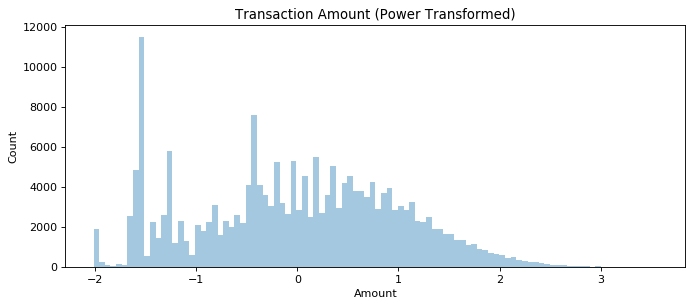

In [27]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(10,4), dpi=80)
sns.distplot(X_train['Amount'], bins=100, kde=False)
plt.ylabel('Count')
plt.title('Transaction Amount (Power Transformed)')

In [28]:
X_train[headers].skew()

V1       -0.219489
V2        0.347279
V3       -0.076808
V4        0.021198
V5       -0.259166
V6       -1.994689
V7        0.411482
V8        2.299586
V9       -0.053452
V10      -1.320588
V11       0.061638
V12       0.163703
V13       0.005960
V14       0.102408
V15       0.011113
V16       0.033958
V17      -0.787777
V18      -0.060269
V19       0.014187
V20      -0.362501
V21      -2.239834
V22      -0.024129
V23      -0.177482
V24       0.117183
V25       0.069745
V26      -0.025624
V27       1.256028
V28       0.854471
Amount    0.018233
dtype: float64

The preprocessing of data can be said to be done since the impeding factors have been mitigated to an extent.

## Model Building

The class distribution in the dataset is imbalanced. However lets build models to see how it performs on the unbalanced data.
The models are:

        - Logistic Regression
        - Decision Tree
        - Random Forest
        - XGBoost


### LOGISTIC REGRESSION

In [29]:
## Logistic Regression

#KFold Crossvalidation
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold = LogisticRegression()
results_skfold = cross_val_predict(model_skfold, X_train, y_train, cv=skfold,n_jobs=-1)

In [30]:
#ROC AUC score of the above.
print(metrics.roc_auc_score(y_train, results_skfold))

0.8298715157761404


In [31]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, results_skfold)
roc_auc = roc_auc_score(y_train, results_skfold)
print('ROC AUC Score:',roc_auc)

ROC AUC Score: 0.8298715157761404


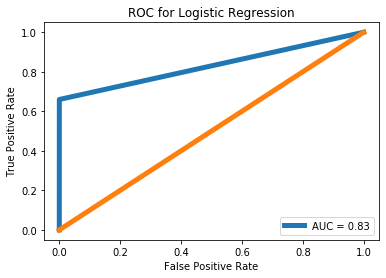

In [32]:
#Plot the ROC curve for better visualization
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Hyperparamter tuning for Logistic Regression

In [33]:
grid = {'penalty': ['l1', 'l2'], 
              'C': np.logspace(0.01, 0.1, 1, 10, 100)}
model = LogisticRegression() 
cv = StratifiedKFold(n_splits=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0) 
grid_result_imb_lr = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result_imb_lr.best_score_, grid_result_imb_lr.best_params_))

Best: 0.973784 using {'C': 1.0471285480508996, 'penalty': 'l2'}


ROC AUC Score: 0.8298715157761404


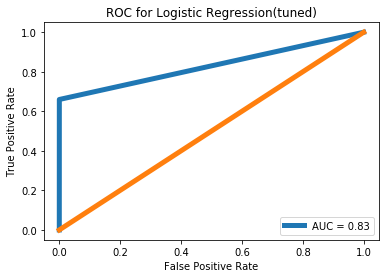

In [34]:
#Rebuild the model with the best hyperparameters obtained above.
skfold = StratifiedKFold(n_splits=3, random_state=1)
model_skfold = LogisticRegression(C=1.0471285,penalty='l2')
results_skfold = cross_val_predict(model_skfold, X_train, y_train, cv=skfold,n_jobs=-1)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, results_skfold)
roc_auc = roc_auc_score(y_train, results_skfold)
print('ROC AUC Score:',roc_auc)

#Plot the ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Logistic Regression(tuned)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### DECISION TREE CLASSIFIER

In [35]:
#Cross  Validation
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_dt = DecisionTreeClassifier()
results_skfold_dt = cross_val_predict(model_skfold_dt, X_train, y_train, cv=skfold,n_jobs=-1)

In [36]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, results_skfold_dt)

In [37]:
roc_auc = roc_auc_score(y_train, results_skfold_dt)
print('ROC AUC Score:',roc_auc)

ROC AUC Score: 0.8849332368138764


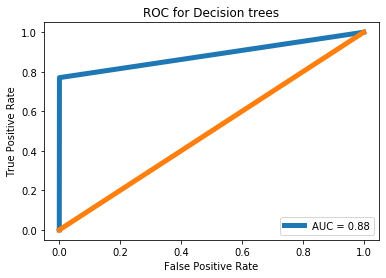

In [38]:
#ROC Curve
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Decision trees')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Hyperparameter tuning for Decision trees

In [39]:
grid = {'max_depth': [3, None], 
              'max_features': [4,8], 
              'min_samples_leaf': [2,4,8], 
              'criterion': ['gini', 'entropy']} 
   
model = DecisionTreeClassifier() 
cv = StratifiedKFold(n_splits=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0) 
grid_result_imb_dt = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result_imb_dt.best_score_, grid_result_imb_dt.best_params_))

Best: 0.932887 using {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 4}


In [47]:
#New model based on the best hyperparameters obtained above
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_dt_tuned = DecisionTreeClassifier(criterion='entropy',max_depth=3,max_features=8,min_samples_leaf=4)
results_skfold_dt_tuned = cross_val_predict(model_skfold_dt_tuned, X_train, y_train, cv=skfold,n_jobs=-1)

In [48]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, results_skfold_dt_tuned)
roc_auc = roc_auc_score(y_train, results_skfold_dt_tuned)
print('ROC AUC Score:',roc_auc)

ROC AUC Score: 0.8719623831191442


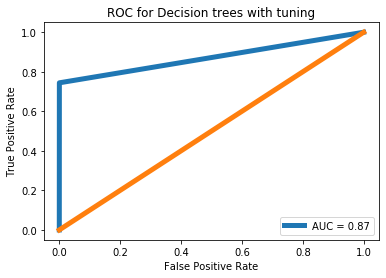

In [49]:
#New ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Decision trees with tuning')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### RANDOM FORESTS

In [43]:
#Cross Validation
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_rf = RandomForestClassifier(warm_start=False,n_jobs=-1)
results_skfold_rf = cross_val_predict(model_skfold_rf, X_train, y_train, cv=skfold,n_jobs=-1)

In [44]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, results_skfold_rf)
roc_auc = roc_auc_score(y_train, results_skfold_rf)
print('ROC AUC Score:',roc_auc)

ROC AUC Score: 0.8952935663822499


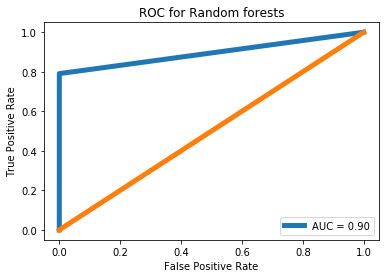

In [45]:
#ROC Curve
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Random forests')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Hyperparameter tuning for Random forest

In [50]:
model = RandomForestClassifier(warm_start=True)
n_estimators = [50, 100,150]
max_features = ['auto','sqrt']
max_depth= [4, 8] 
criterion=['gini', 'entropy']
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth,criterion=criterion)
cv = StratifiedKFold(n_splits=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result_imb_rf = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result_imb_rf.best_score_, grid_result_imb_rf.best_params_))

Best: 0.982065 using {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 50}


In [51]:
#New model based on the best hyperparameters obtained above
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_rf_tuned = RandomForestClassifier(criterion='entropy',max_depth=8,max_features='auto',
                                               n_estimators=50,warm_start=False,n_jobs=-1)
results_skfold_rf_tuned = cross_val_predict(model_skfold_rf_tuned, X_train, y_train, cv=skfold,n_jobs=-1)

In [52]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, results_skfold_rf_tuned)
roc_auc = roc_auc_score(y_train, results_skfold_rf_tuned)
print('ROC AUC Score:',roc_auc)

ROC AUC Score: 0.8953086402441732


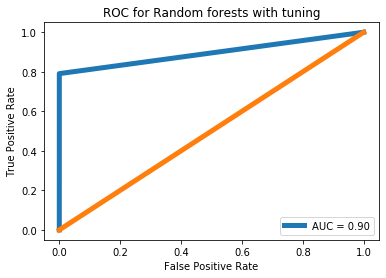

In [53]:
#ROC on new model
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Random forests with tuning')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XG BOOST

In [54]:
#Cross Vaidation
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_rf = XGBClassifier(n_jobs=-1)
results_skfold_rf = cross_val_predict(model_skfold_rf, X_train, y_train, cv=skfold,n_jobs=-1)

In [55]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, results_skfold_rf)
roc_auc = roc_auc_score(y_train, results_skfold_rf)
print('ROC AUC Score:',roc_auc)

ROC AUC Score: 0.8938526395617596


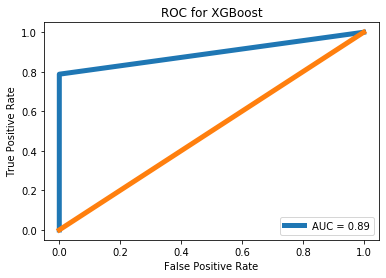

In [56]:
#ROC Curve
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for XGBoost')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Hyperparameter tuning for XG Boost

In [57]:
model = XGBClassifier()
n_estimators = [50,100]
max_depth= [4, 8]
grid = dict(n_estimators=n_estimators,max_depth=max_depth)
cv = StratifiedKFold(n_splits=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result_imb_rf = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result_imb_rf.best_score_, grid_result_imb_rf.best_params_))

Best: 0.973475 using {'max_depth': 8, 'n_estimators': 50}


In [58]:
#New model based on the best hyperparameters obtained above
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_rf_tuned = XGBClassifier(max_depth=8,n_estimators=50,n_jobs=-1)
results_skfold_rf_tuned = cross_val_predict(model_skfold_rf_tuned, X_train, y_train, cv=skfold,n_jobs=-1)

In [59]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, results_skfold_rf_tuned)
roc_auc = roc_auc_score(y_train, results_skfold_rf_tuned)
print('ROC AUC Score:',roc_auc)

ROC AUC Score: 0.8894871498248393


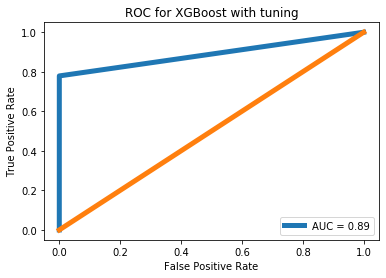

In [60]:
#Plot the ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for XGBoost with tuning')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

From the roc auc score, XGBoost model seems to be the best option. However lets examine other metrics for the above models as well. For better evaluation of the models the confusion metrics and the precision , accuracy ,recall and F1 score of the models may be analysed.

In [61]:
# Fit the 4 models to our data
logreg_model =LogisticRegression(C=1.0471285,penalty='l2').fit(X_train, y_train)
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=3,max_features=8,min_samples_leaf=4).fit(X_train, y_train)
rf_model = RandomForestClassifier(criterion='entropy',max_depth=8,max_features='auto',n_estimators=50,
                                  warm_start=False,n_jobs=-1).fit(X_train, y_train)
xgboost_model = XGBClassifier(max_depth=8,n_estimators=50,n_jobs=-1).fit(X_train, y_train)

y_log = logreg_model.predict(X_test)
y_dt = dt_model.predict(X_test)
y_rf = rf_model.predict(X_test)
y_xgboost = xgboost_model.predict(X_test)

print('Logistic Regression Metric\n')
print('Classifcation report:\n', classification_report(y_test, y_log))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_log))
print('*'*25)

print('\nDecision Tree Metric\n')
print('Classifcation report:\n', classification_report(y_test, y_dt))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_dt))
print('*'*25)

print('\nRandom Forest Metric\n')
print('Classifcation report:\n', classification_report(y_test, y_rf))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_rf))
print('*'*25)

print('\nXGBoost Metric\n')
print('Classifcation report:\n', classification_report(y_test, y_xgboost))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_xgboost))
print('*'*25)

Logistic Regression Metric

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.63      0.73       148

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85282    13]
 [   55    93]]
*************************

Decision Tree Metric

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.81      0.63      0.71       148

    accuracy                           1.00     85443
   macro avg       0.90      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85273    22]
 [   55    93]]
*************************

Random Forest Metric

Classifcation report:
               precision    recall  f1-score   suppo

#### Proceed with the model which shows the best result 

From the above models metrics, it can be clearly seen that the best performance is that of XGBoost with tuned parameters.

In [63]:
clf = XGBClassifier(max_depth=8,n_estimators=50,n_jobs=-1).fit(X_train, y_train) 
y_xgboost = xgboost_model.predict(X_test)
print('Classifcation report:\n', classification_report(y_test, y_xgboost))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_xgboost))
roc_auc = roc_auc_score(y_test, y_xgboost)
print('ROC AUC Score:',roc_auc)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85290     5]
 [   35   113]]
ROC AUC Score: 0.8817274467151365


####  Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 27


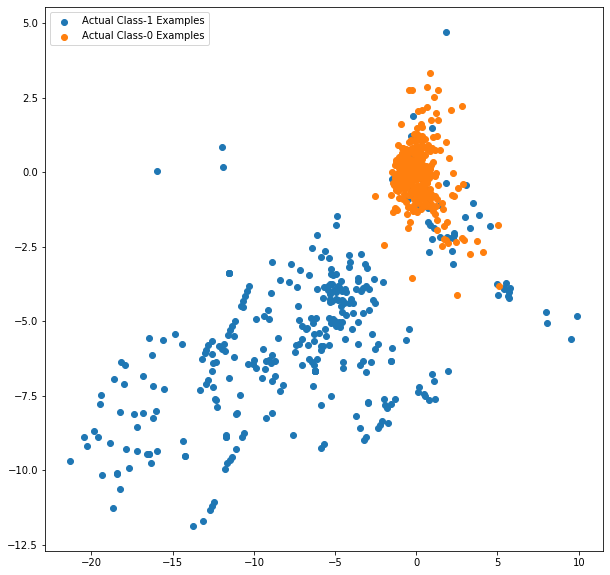

In [64]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

As mentioned before , there is a large class imbalance in the dataset which is affecting the model performance as there is a clear bias being made to predictiong 0's (Valid cases).SO this has to be mitigated so as to improve the model performance in detecting the fraud cases.

##### Perform class balancing with :
- Random Oversampling
- SMOTE
        A quick explanation of how SMOTE works: it consists of synthesizing elements for the minority class using the existing ones. It randomly chooses a point from the minority class and computes the k-nearest neighbors (default = 5) for this point. The synthetic points are added between the chosen point and its neighbors by choosing a factor between 0 and 1 to multiply the distance. 
- ADASYN



In [65]:
# Oversampling and balancing using SMOTE and random over sampling
over_sample = RandomOverSampler(random_state=0)
smote_sample = SMOTE(random_state=42)
adasyn_sample = ADASYN(random_state=0)

# resample the training data

X_oversam, y_oversam = over_sample.fit_sample(X_train,y_train)
X_smote, y_smote = smote_sample.fit_sample(X_train,y_train)
X_adasyn, y_adasyn = adasyn_sample.fit_sample(X_train,y_train)

# resample the testing data

X_oversam_test, y_oversam_test = over_sample.fit_sample(X_test,y_test)
X_smote_test, y_smote_test = smote_sample.fit_sample(X_test,y_test)
X_adasyn_test, y_adasyn_test = adasyn_sample.fit_sample(X_test,y_test)

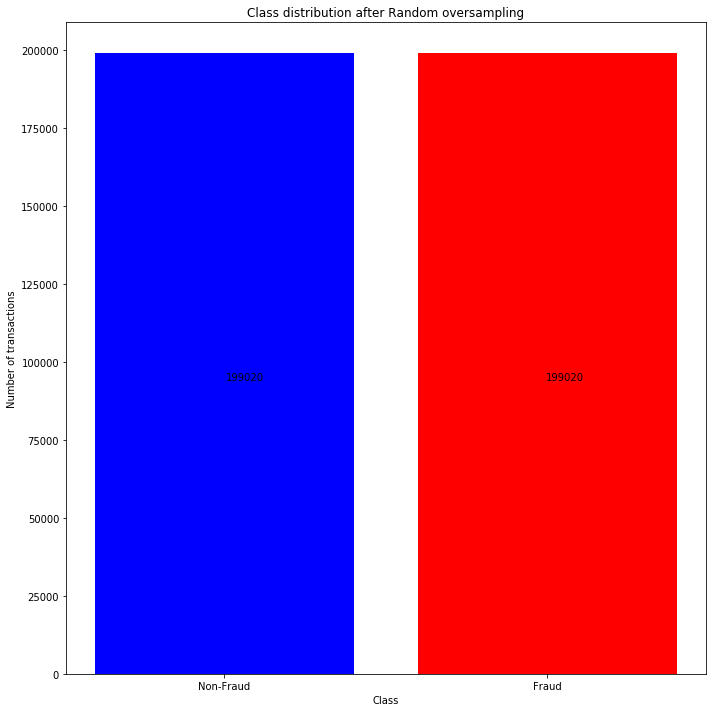

In [66]:
#Examine the class distribution after Random Sampling
plt.bar(['Non-Fraud','Fraud'], [Counter(y_oversam)[0], Counter(y_oversam)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.title("Class distribution after Random oversampling")
plt.annotate('{}'.format(Counter(y_oversam)[0]), (0.25, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_oversam)[1]), (0.75, 0.45), xycoords='axes fraction')
plt.rcParams['figure.figsize'] = [8, 8]

plt.tight_layout()
plt.show()

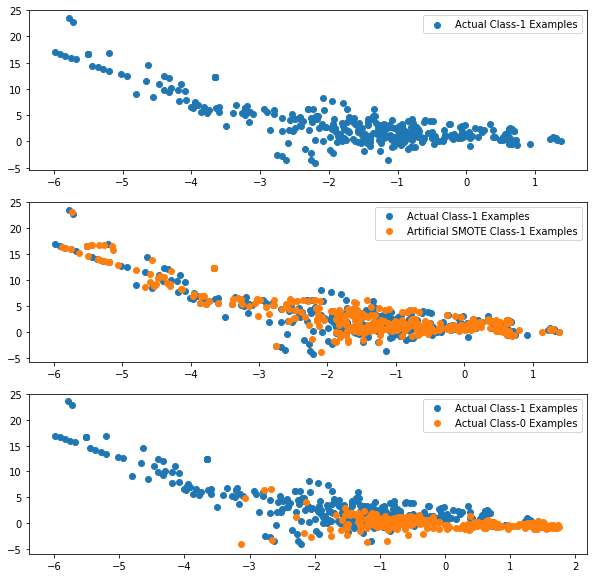

In [67]:
#Examine the class distribution after Random Sampling
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [10,10]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

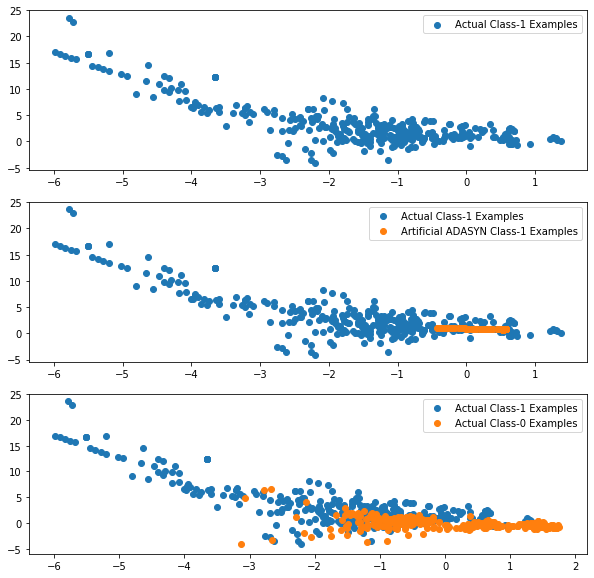

In [84]:
#Display class distribution after ADASYN
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [10,10]
fig = plt.figure()
plt.title("Class distribution after ADASYN")

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

###  Model Building
Now the various models can be built on the data with mitigated imbalance . The models built are:

        - Logistic Regression
            - Random Oversampled
            - SMOTE
            - ADASYN
        - Decision Tree
            - Random Oversampled
            - SMOTE
            - ADASYN        
        - Random Forest
            - Random Oversampled
            - SMOTE
            - ADASYN
        - XGBoost
            - Random Oversampled
            - SMOTE
            - ADASYN
So a total of 12 models are built on balanced data to find the best model with the best balancing method.         

### Logistic regression model with Random oversampling 

0.9496658627273641


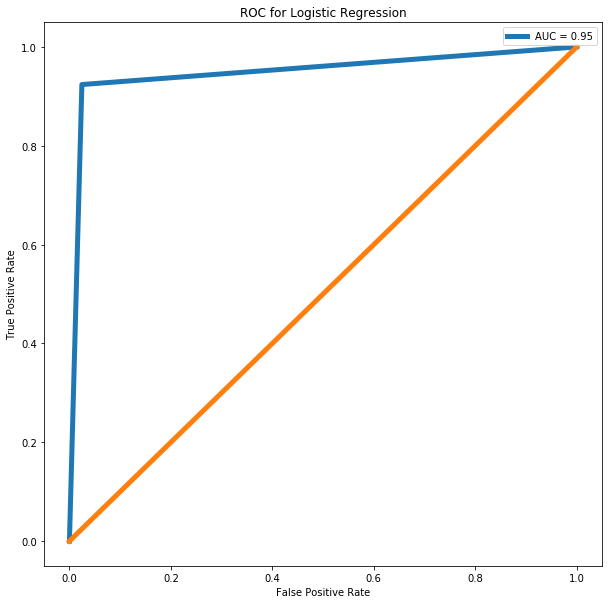

In [68]:
#Modeling with Logistic Regression on Random Oversampling Balanced train dataset
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold = LogisticRegression()
results_skfold = cross_val_predict(model_skfold, X_oversam, y_oversam, cv=skfold,n_jobs=-1)
roc_auc = roc_auc_score(y_oversam, results_skfold)
print(metrics.roc_auc_score(y_oversam, results_skfold))
false_positive_rate, true_positive_rate, threshold = roc_curve(y_oversam, results_skfold)
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='upper right')
plt.title('ROC for Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['figure.figsize'] = [5,5]
plt.show()

Hyperparamter tuning for Logistic Regression

In [69]:
grid = {'penalty': ['l1', 'l2'], 
              'C': np.logspace(0.01, 0.1, 1, 10, 100)}
model = LogisticRegression() 
cv = StratifiedKFold(n_splits=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0) 
grid_result_imb_lr = grid_search.fit(X_oversam, y_oversam)
print("Best: %f using %s" % (grid_result_imb_lr.best_score_, grid_result_imb_lr.best_params_))

Best: 0.987353 using {'C': 1.0471285480508996, 'penalty': 'l2'}


ROC AUC Score: 0.9496658627273641


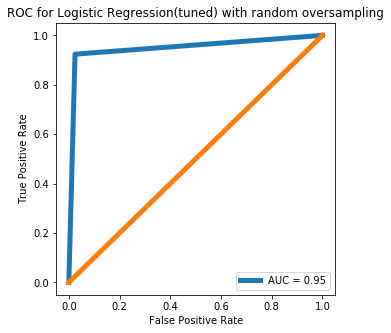

In [70]:
#Build a new model with the best hyperparameter values obtained above
skfold = StratifiedKFold(n_splits=3, random_state=1)
model_skfold = LogisticRegression(C=1.0471285,penalty='l2')
results_skfold = cross_val_predict(model_skfold, X_oversam, y_oversam, cv=skfold,n_jobs=-1)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_oversam, results_skfold)
roc_auc = roc_auc_score(y_oversam, results_skfold)
print('ROC AUC Score:',roc_auc)

#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Logistic Regression(tuned) with random oversampling')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Logistic regression model with SMOTE

0.9440307506783238


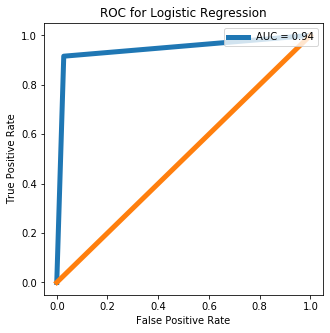

In [71]:
#Modeling with Logistic Regression on SMOTE Balanced train dataset
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold = LogisticRegression()
results_skfold = cross_val_predict(model_skfold, X_smote, y_smote, cv=skfold,n_jobs=-1)
roc_auc = roc_auc_score(y_smote, results_skfold)
print(metrics.roc_auc_score(y_smote, results_skfold))

#Plot ROC
false_positive_rate, true_positive_rate, threshold = roc_curve(y_smote, results_skfold)
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='upper right')
plt.title('ROC for Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Hyperparamter tuning for Logistic Regression

In [72]:
grid = {'penalty': ['l1', 'l2'], 
              'C': np.logspace(0.01, 0.1, 1, 10, 100)}
model = LogisticRegression() 
cv = StratifiedKFold(n_splits=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0) 
grid_result_imb_lr = grid_search.fit(X_smote, y_smote)
print("Best: %f using %s" % (grid_result_imb_lr.best_score_, grid_result_imb_lr.best_params_))

Best: 0.989195 using {'C': 1.0471285480508996, 'penalty': 'l2'}


ROC AUC Score: 0.9440282383680033


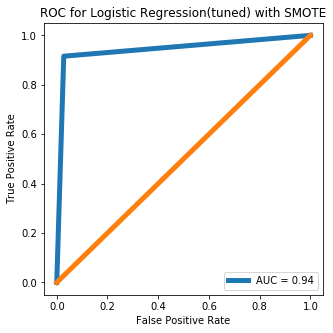

In [73]:
#Build a new model with the best hyperparameter values obtained above
skfold = StratifiedKFold(n_splits=3, random_state=1)
model_skfold = LogisticRegression(C=1.0471285,penalty='l2')
results_skfold = cross_val_predict(model_skfold, X_smote, y_smote, cv=skfold,n_jobs=-1)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_smote, results_skfold)
roc_auc = roc_auc_score(y_smote, results_skfold)
print('ROC AUC Score:',roc_auc)

#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Logistic Regression(tuned) with SMOTE')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Logistic regression model with ADASYN

0.8601369920841834


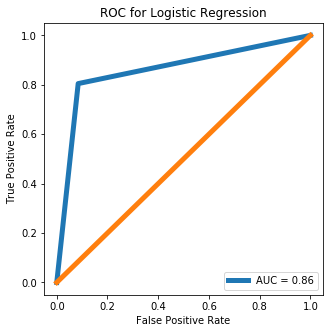

In [74]:
#Modeling with Logistic Regression on ADASYN Balanced train dataset
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold = LogisticRegression()
results_skfold = cross_val_predict(model_skfold, X_adasyn, y_adasyn, cv=skfold,n_jobs=-1)
roc_auc = roc_auc_score(y_adasyn, results_skfold)
print(metrics.roc_auc_score(y_adasyn, results_skfold))
false_positive_rate, true_positive_rate, threshold = roc_curve(y_adasyn, results_skfold)
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)

#Plot ROC
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Hyperparamter tuning for Logistic Regression

In [75]:
grid = {'penalty': ['l1', 'l2'], 
              'C': np.logspace(0.01, 0.1, 1, 10, 100)}
model = LogisticRegression() 
cv = StratifiedKFold(n_splits=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0) 
grid_result_imb_lr = grid_search.fit(X_adasyn, y_adasyn)
print("Best: %f using %s" % (grid_result_imb_lr.best_score_, grid_result_imb_lr.best_params_))

Best: 0.938279 using {'C': 1.0471285480508996, 'penalty': 'l2'}


ROC AUC Score: 0.8601369920841834


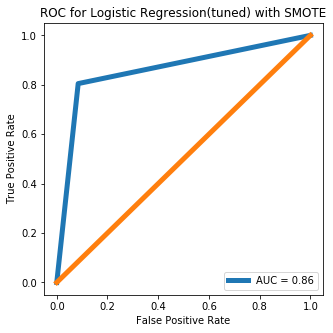

In [76]:
#Build a new model with the best hyperparameter values obtained above
skfold = StratifiedKFold(n_splits=3, random_state=1)
model_skfold = LogisticRegression(C=1.0471285,penalty='l2')
results_skfold = cross_val_predict(model_skfold, X_adasyn, y_adasyn, cv=skfold,n_jobs=-1)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_adasyn, results_skfold)
roc_auc = roc_auc_score(y_adasyn, results_skfold)
print('ROC AUC Score:',roc_auc)

#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Logistic Regression(tuned) with SMOTE')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree with Random Oversampling

ROC AUC Score: 0.999731182795699


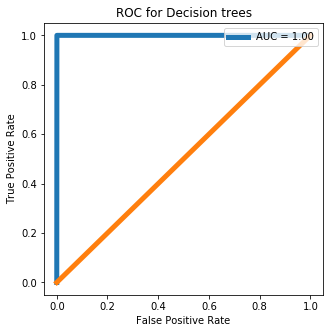

In [77]:
#Modeling with Decision Trees on Random Oversampling balanced train dataset
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_dt = DecisionTreeClassifier()
results_skfold_dt = cross_val_predict(model_skfold_dt, X_oversam, y_oversam, cv=skfold,n_jobs=-1)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_oversam, results_skfold_dt)
roc_auc = roc_auc_score(y_oversam, results_skfold_dt)
print('ROC AUC Score:',roc_auc)
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)

#Plot ROC
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='upper right')
plt.title('ROC for Decision trees')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Hyperparameter tuning for Decision trees

In [78]:
grid = {'max_depth': [3, None], 
              'max_features': [4,8], 
              'min_samples_leaf': [2,4,8], 
              'criterion': ['gini', 'entropy']} 
   
model = DecisionTreeClassifier() 
cv = StratifiedKFold(n_splits=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0) 
grid_result_imb_dt = grid_search.fit(X_oversam, y_oversam)
print("Best: %f using %s" % (grid_result_imb_dt.best_score_, grid_result_imb_dt.best_params_))

Best: 0.999800 using {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 8}


In [79]:
#Build a new model with the best hyperparameter values obtained above
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_dt_tuned = DecisionTreeClassifier(criterion='entropy',max_features=8,min_samples_leaf=8)
results_skfold_dt_tuned = cross_val_predict(model_skfold_dt_tuned, X_oversam, y_oversam, cv=skfold,n_jobs=-1)

In [80]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_oversam, results_skfold_dt_tuned)
roc_auc = roc_auc_score(y_oversam, results_skfold_dt_tuned)
print('ROC AUC Score:',roc_auc)

ROC AUC Score: 0.9994950256255652


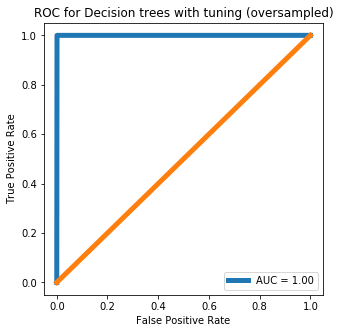

In [81]:
#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Decision trees with tuning (oversampled)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree with SMOTE

ROC AUC Score: 0.9979474424680936


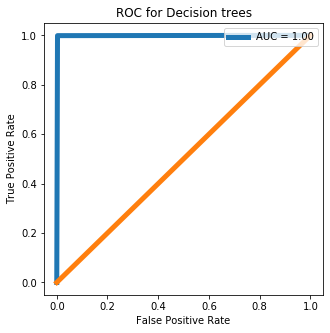

In [82]:
#Modeling with Decision Trees on SMOTE balanced train dataset
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_dt = DecisionTreeClassifier()
results_skfold_dt = cross_val_predict(model_skfold_dt, X_smote, y_smote, cv=skfold,n_jobs=-1)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_smote, results_skfold_dt)
roc_auc = roc_auc_score(y_smote, results_skfold_dt)
print('ROC AUC Score:',roc_auc)

#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='upper right')
plt.title('ROC for Decision trees')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Hyperparameter tuning for Decision trees

In [83]:
grid = {'max_depth': [3, None], 
              'max_features': [4,8], 
              'min_samples_leaf': [2,4,8], 
              'criterion': ['gini', 'entropy']} 
   
model = DecisionTreeClassifier() 
cv = StratifiedKFold(n_splits=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0) 
grid_result_imb_dt = grid_search.fit(X_smote, y_smote)
print("Best: %f using %s" % (grid_result_imb_dt.best_score_, grid_result_imb_dt.best_params_))

Best: 0.998668 using {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 8}


In [85]:
#Build a new model with the best hyperparameter values obtained above
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_dt_tuned = DecisionTreeClassifier(criterion='entropy',max_features=8,min_samples_leaf=8)
results_skfold_dt_tuned = cross_val_predict(model_skfold_dt_tuned, X_smote, y_smote, cv=skfold,n_jobs=-1)

In [86]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_smote, results_skfold_dt_tuned)
roc_auc = roc_auc_score(y_smote, results_skfold_dt_tuned)
print('ROC AUC Score:',roc_auc)

ROC AUC Score: 0.9966787257562054


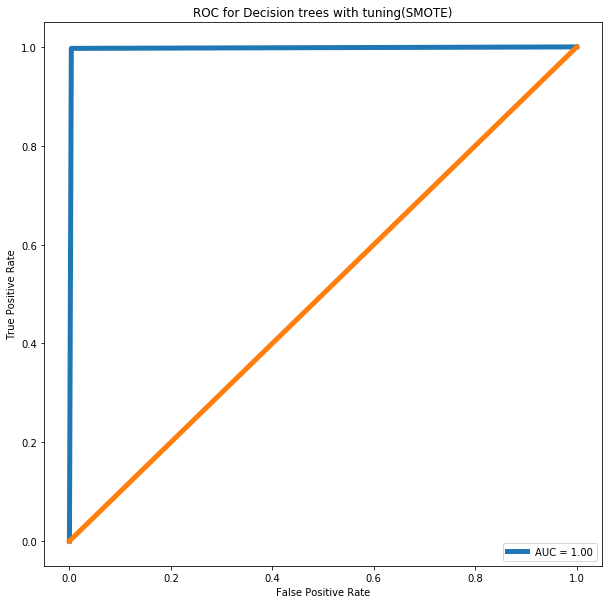

In [87]:
#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Decision trees with tuning(SMOTE)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree with ADASYN

ROC AUC Score: 0.8872056934204068


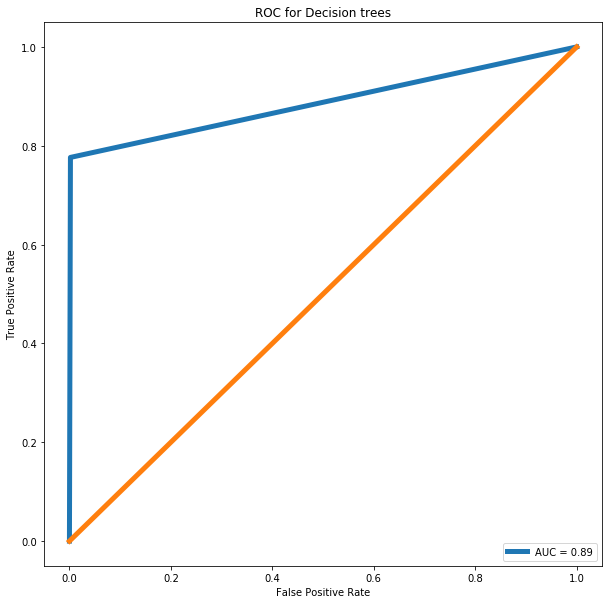

In [88]:
#Modeling with Decision Trees on ADASYN balanced train dataset
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_dt = DecisionTreeClassifier()
results_skfold_dt = cross_val_predict(model_skfold_dt, X_adasyn, y_adasyn, cv=skfold,n_jobs=-1)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_adasyn, results_skfold_dt)
roc_auc = roc_auc_score(y_adasyn, results_skfold_dt)
print('ROC AUC Score:',roc_auc)

#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Decision trees')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Hyperparameter tuning for Decision trees

In [89]:
grid = {'max_depth': [3, None], 
              'max_features': [4,8], 
              'min_samples_leaf': [2,4,8], 
              'criterion': ['gini', 'entropy']} 
   
model = DecisionTreeClassifier() 
cv = StratifiedKFold(n_splits=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0) 
grid_result_imb_dt = grid_search.fit(X_adasyn, y_adasyn)
print("Best: %f using %s" % (grid_result_imb_dt.best_score_, grid_result_imb_dt.best_params_))

Best: 0.897140 using {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 8}


In [90]:
#Build a new model with the best hyperparameter values obtained above
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_dt_tuned = DecisionTreeClassifier(criterion='gini',max_features=8,min_samples_leaf=8)
results_skfold_dt_tuned = cross_val_predict(model_skfold_dt_tuned, X_adasyn, y_adasyn, cv=skfold,n_jobs=-1)

In [91]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_adasyn, results_skfold_dt_tuned)
roc_auc = roc_auc_score(y_adasyn, results_skfold_dt_tuned)
print('ROC AUC Score:',roc_auc)

ROC AUC Score: 0.867987910147014


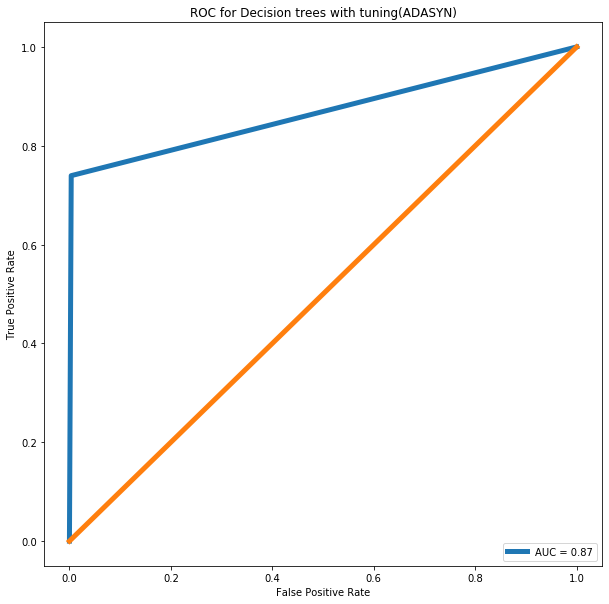

In [92]:
#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Decision trees with tuning(ADASYN)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random forest with Random Oversampling

ROC AUC Score: 0.9999422168626269


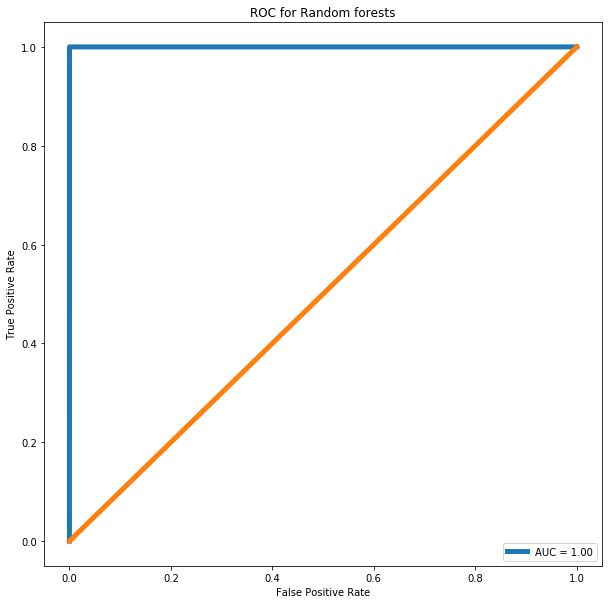

In [93]:
#Modeling with Random Forests on Random Oversampling balanced train dataset
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_rf = RandomForestClassifier(warm_start=False,n_jobs=-1)
results_skfold_rf = cross_val_predict(model_skfold_rf, X_oversam, y_oversam, cv=skfold,n_jobs=-1)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_oversam, results_skfold_rf)
roc_auc = roc_auc_score(y_oversam, results_skfold_rf)
print('ROC AUC Score:',roc_auc)

#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Random forests')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Hyperparameter tuning for Random forest

In [94]:
model = RandomForestClassifier(warm_start=True)
n_estimators = [50, 100]
max_features = ['auto','sqrt']
max_depth= [6,8] 
criterion=['gini', 'entropy']
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth,criterion=criterion)
cv = StratifiedKFold(n_splits=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result_imb_rf = grid_search.fit(X_oversam, y_oversam)
print("Best: %f using %s" % (grid_result_imb_rf.best_score_, grid_result_imb_rf.best_params_))

Best: 0.999930 using {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}


In [95]:
#Build a new model with the best hyperparameter values obtained above
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_rf_tuned = RandomForestClassifier(criterion='entropy',max_depth=8,max_features='sqrt',
                                               n_estimators=100,warm_start=False,n_jobs=-1)
results_skfold_rf_tuned = cross_val_predict(model_skfold_rf_tuned, X_oversam, y_oversam, cv=skfold,n_jobs=-1)

In [96]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_oversam, results_skfold_rf_tuned)
roc_auc = roc_auc_score(y_oversam, results_skfold_rf_tuned)
print('ROC AUC Score:',roc_auc)

ROC AUC Score: 0.9867751984725154


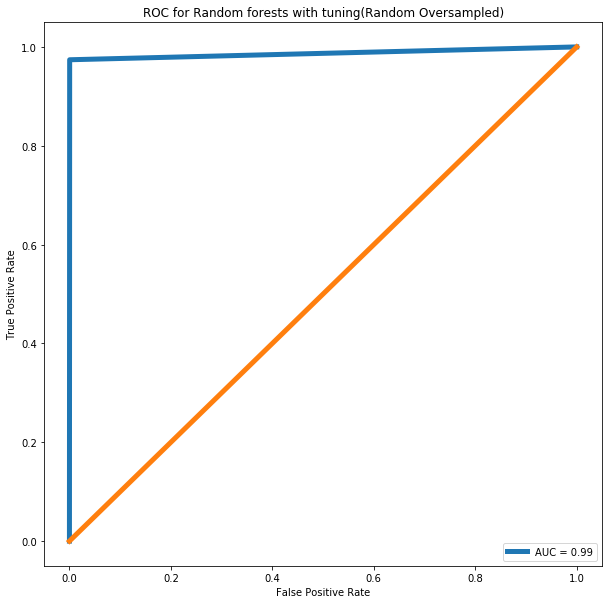

In [97]:
#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Random forests with tuning(Random Oversampled)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest with SMOTE

ROC AUC Score: 0.9998718721736508


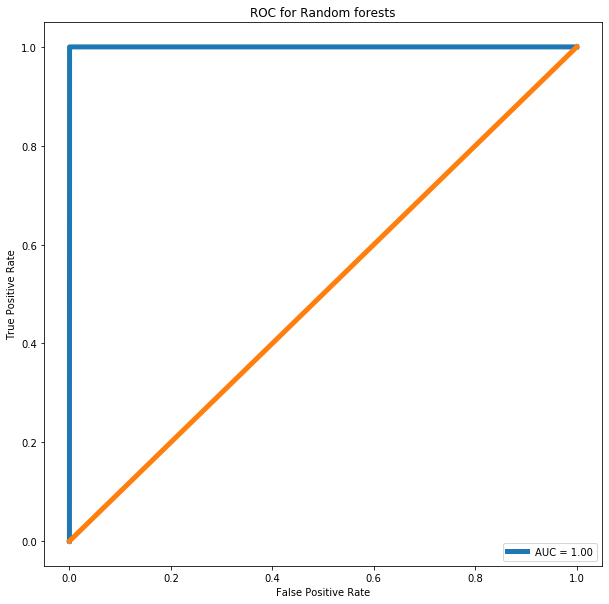

In [98]:
#Modeling with Random Forests on SMOTE balanced train dataset
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_rf = RandomForestClassifier(warm_start=False,n_jobs=-1)
results_skfold_rf = cross_val_predict(model_skfold_rf, X_smote, y_smote, cv=skfold,n_jobs=-1)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_smote, results_skfold_rf)
roc_auc = roc_auc_score(y_smote, results_skfold_rf)
print('ROC AUC Score:',roc_auc)

#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Random forests')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Hyperparameter tuning for Random forest

In [99]:
model = RandomForestClassifier(warm_start=True)
n_estimators = [50, 100]
max_features = ['auto','sqrt']
max_depth= [4, 8] 
criterion=['gini', 'entropy']
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth,criterion=criterion)
cv = StratifiedKFold(n_splits=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result_imb_rf = grid_search.fit(X_smote, y_smote)
print("Best: %f using %s" % (grid_result_imb_rf.best_score_, grid_result_imb_rf.best_params_))

Best: 0.998958 using {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}


In [100]:
#Build a new model with the best hyperparameter values obtained above
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_rf_tuned = RandomForestClassifier(criterion='entropy',max_depth=8,max_features='sqrt',
                                               n_estimators=100,warm_start=False,n_jobs=-1)
results_skfold_rf_tuned = cross_val_predict(model_skfold_rf_tuned, X_smote, y_smote, cv=skfold,n_jobs=-1)

In [101]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_smote, results_skfold_rf_tuned)
roc_auc = roc_auc_score(y_smote, results_skfold_rf_tuned)
print('ROC AUC Score:',roc_auc)

ROC AUC Score: 0.9738368003215758


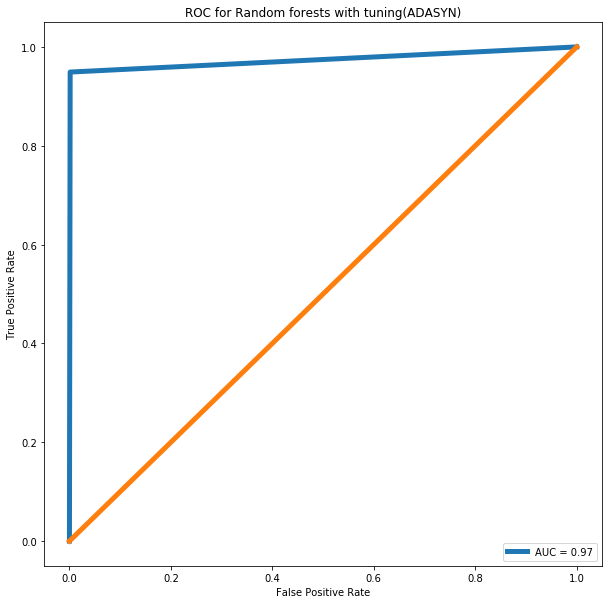

In [102]:
#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Random forests with tuning(ADASYN)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest with ADASYN

ROC AUC Score: 0.876597072205923


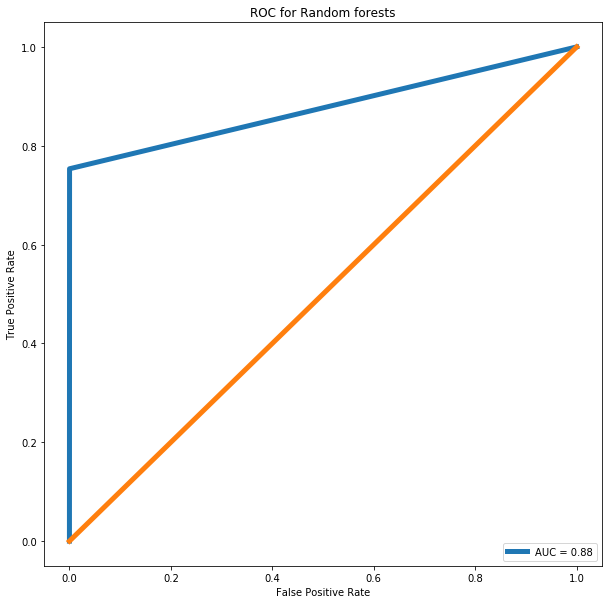

In [103]:
#Modeling with Random Forests on ADASYN balanced train dataset
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_rf = RandomForestClassifier(warm_start=False,n_jobs=-1)
results_skfold_rf = cross_val_predict(model_skfold_rf, X_adasyn, y_adasyn, cv=skfold,n_jobs=-1)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_adasyn, results_skfold_rf)
roc_auc = roc_auc_score(y_adasyn, results_skfold_rf)
print('ROC AUC Score:',roc_auc)

#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Random forests')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Hyperparameter tuning for Random forest

In [104]:
model = RandomForestClassifier(warm_start=True)
n_estimators = [50, 100]
max_features = ['auto','sqrt']
max_depth= [4, 8] 
criterion=['gini', 'entropy']
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth,criterion=criterion)
cv = StratifiedKFold(n_splits=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result_imb_rf = grid_search.fit(X_adasyn, y_adasyn)
print("Best: %f using %s" % (grid_result_imb_rf.best_score_, grid_result_imb_rf.best_params_))

Best: 0.984139 using {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}


In [105]:
#Build a new model with the best hyperparameter values obtained above
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_rf_tuned = RandomForestClassifier(criterion='entropy',max_depth=8,max_features='auto',n_estimators=100,warm_start=False,n_jobs=-1)
results_skfold_rf_tuned = cross_val_predict(model_skfold_rf_tuned, X_adasyn, y_adasyn, cv=skfold,n_jobs=-1)

In [106]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_adasyn, results_skfold_rf_tuned)
roc_auc = roc_auc_score(y_adasyn, results_skfold_rf_tuned)
print('ROC AUC Score:',roc_auc)

ROC AUC Score: 0.9019888937821098


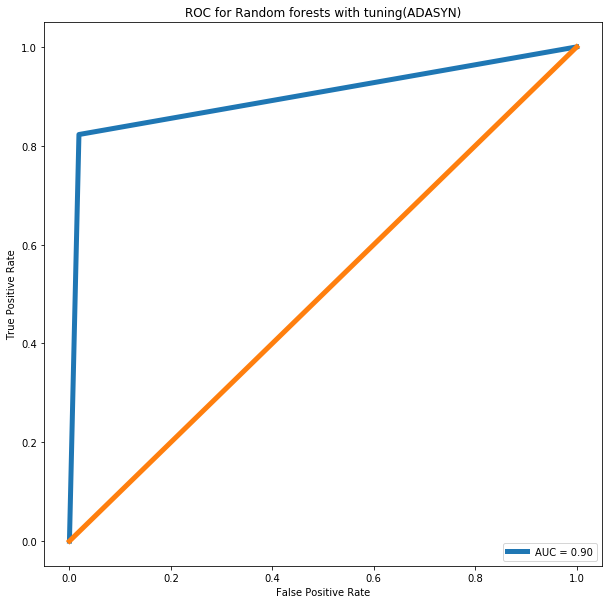

In [107]:
#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Random forests with tuning(ADASYN)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGBoost with Random Oversampling

ROC AUC Score: 0.9999145814491006


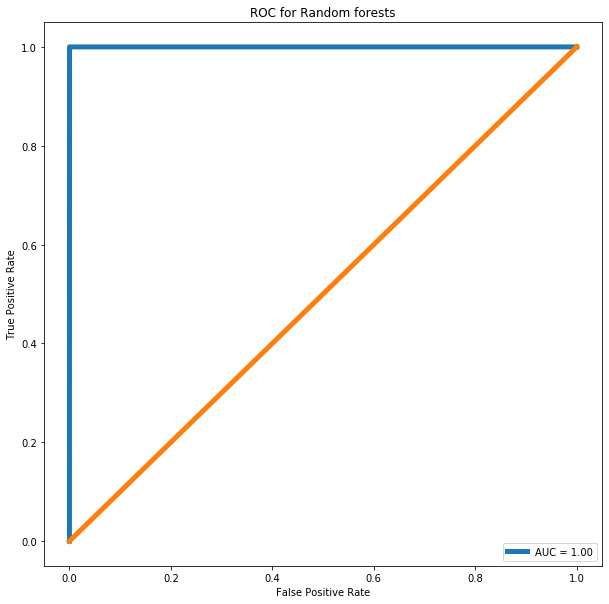

In [108]:
#Modeling with Random Forests on Random Oversampling balanced train dataset
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_rf = XGBClassifier(n_jobs=-1)
results_skfold_rf = cross_val_predict(model_skfold_rf, X_oversam, y_oversam, cv=skfold,n_jobs=-1)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_oversam, results_skfold_rf)
roc_auc = roc_auc_score(y_oversam, results_skfold_rf)
print('ROC AUC Score:',roc_auc)
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Random forests')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Hyperparameter tuning for XG Boost

In [109]:
model = XGBClassifier()
n_estimators = [50, 100]
max_depth= [4, 8]
grid = dict(n_estimators=n_estimators,max_depth=max_depth)
cv = StratifiedKFold(n_splits=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result_imb_rf = grid_search.fit(X_oversam, y_oversam)
print("Best: %f using %s" % (grid_result_imb_rf.best_score_, grid_result_imb_rf.best_params_))

Best: 0.999991 using {'max_depth': 8, 'n_estimators': 100}


In [110]:
#Build a new model with the best hyperparameter values obtained above
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_rf_tuned = XGBClassifier(max_depth=8,n_estimators=100,n_jobs=-1)
results_skfold_rf_tuned = cross_val_predict(model_skfold_rf_tuned, X_oversam, y_oversam, cv=skfold,n_jobs=-1)

In [111]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_oversam, results_skfold_rf_tuned)
roc_auc = roc_auc_score(y_oversam, results_skfold_rf_tuned)
print('ROC AUC Score:',roc_auc)

ROC AUC Score: 0.99991206913878


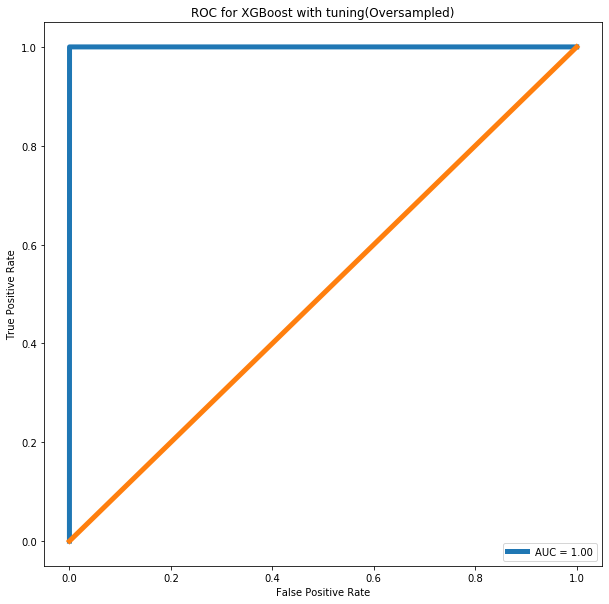

In [112]:
#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for XGBoost with tuning(Oversampled)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGBoost with SMOTE

ROC AUC Score: 0.9997286704853784


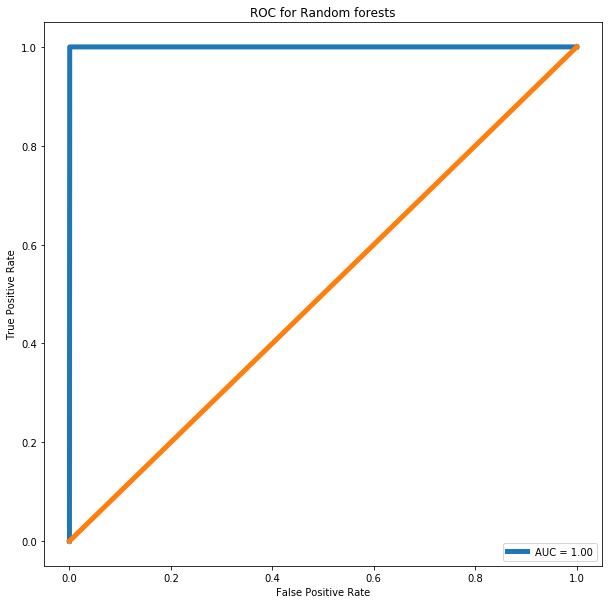

In [113]:
#Modeling with Random Forests on SMOTE balanced train dataset
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_rf = XGBClassifier(n_jobs=-1)
results_skfold_rf = cross_val_predict(model_skfold_rf, X_smote, y_smote, cv=skfold,n_jobs=-1)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_smote, results_skfold_rf)
roc_auc = roc_auc_score(y_smote, results_skfold_rf)
print('ROC AUC Score:',roc_auc)

#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Random forests')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Hyperparameter tuning for XG Boost

In [114]:
model = XGBClassifier()
n_estimators = [50, 100]
max_depth= [4, 8]
grid = dict(n_estimators=n_estimators,max_depth=max_depth)
cv = StratifiedKFold(n_splits=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result_imb_rf = grid_search.fit(X_smote, y_smote)
print("Best: %f using %s" % (grid_result_imb_rf.best_score_, grid_result_imb_rf.best_params_))

Best: 0.999992 using {'max_depth': 8, 'n_estimators': 100}


In [ ]:
#Build a new model with the best hyperparameter values obtained above
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_rf_tuned = XGBClassifier(max_depth=8,n_estimators=100,n_jobs=-1)
results_skfold_rf_tuned = cross_val_predict(model_skfold_rf_tuned, X_smote, y_smote, cv=skfold,n_jobs=-1)

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_smote, results_skfold_rf_tuned)
roc_auc = roc_auc_score(y_smote, results_skfold_rf_tuned)
print('ROC AUC Score:',roc_auc)

In [ ]:
#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for XGBoost with tuning(SMOTE)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGBoost with ADASYN

In [ ]:
#Modeling with Random Forests on ADASYN balanced train dataset
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_rf = XGBClassifier(n_jobs=-1)
results_skfold_rf = cross_val_predict(model_skfold_rf, X_adasyn, y_adasyn, cv=skfold,n_jobs=-1)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_adasyn, results_skfold_rf)
roc_auc = roc_auc_score(y_adasyn, results_skfold_rf)
print('ROC AUC Score:',roc_auc)

#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for Random forests')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Hyperparameter tuning for XG Boost

In [ ]:
model = XGBClassifier()
n_estimators = [50, 100]
max_depth= [4, 8]
grid = dict(n_estimators=n_estimators,max_depth=max_depth)
cv = StratifiedKFold(n_splits=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result_imb_rf = grid_search.fit(X_adasyn, y_adasyn)
print("Best: %f using %s" % (grid_result_imb_rf.best_score_, grid_result_imb_rf.best_params_))

In [ ]:
#Build a new model with the best hyperparameter values obtained above
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold_rf_tuned = XGBClassifier(max_depth=8,n_estimators=100,n_jobs=-1)
results_skfold_rf_tuned = cross_val_predict(model_skfold_rf_tuned, X_adasyn, y_adasyn, cv=skfold,n_jobs=-1)

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_adasyn, results_skfold_rf_tuned)
roc_auc = roc_auc_score(y_adasyn, results_skfold_rf_tuned)
print('ROC AUC Score:',roc_auc)

In [ ]:
#Plot ROC
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.legend(loc='lower right')
plt.title('ROC for XGBoost with tuning(ADASYN)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The ROC AUC score is insuffucient ot evaluate a model.Lets examine the precision ,recall and accuracy for the various models above so as to decide on the best model and balancing method..

In [115]:
# Function to find accuracy , precision and recall
def print_metrics(tn,fp,fn,tp):
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('\nAccuracy = {:2.2f}%'.format(accuracy*100))
    print('\nPrecision = {:2.2f}%'.format(precision*100))
    print('\nRecall = {:2.2f}%\n'.format(recall*100))
    return

In [116]:
#Logistic Regression

logreg_os =LogisticRegression(C=1.0471285,penalty='l2').fit(X_oversam, y_oversam)
logreg_smote =LogisticRegression(C=1.0471285,penalty='l2').fit(X_smote, y_smote)
logreg_adasyn =LogisticRegression(C=1.0471285,penalty='l2').fit(X_adasyn, y_adasyn)

y_log1 = logreg_os.predict(X_oversam_test)
y_log2 = logreg_smote.predict(X_smote_test)
y_log3 = logreg_adasyn.predict(X_adasyn_test)

print('\nLogistic Regression with Random Oversampling\n')
cnf_matrix = confusion_matrix(y_oversam_test, y_log1)
tp = cnf_matrix[1,1] # true positive 
tn = cnf_matrix[0,0] # true negatives
fp = cnf_matrix[0,1] # false positives
fn = cnf_matrix[1,0] # false negatives
print_metrics(tn,fp,fn,tp)

print('\nLogistic Regression with SMOTE\n')
cnf_matrix = confusion_matrix(y_smote_test, y_log2)
tp = cnf_matrix[1,1] # true positive 
tn = cnf_matrix[0,0] # true negatives
fp = cnf_matrix[0,1] # false positives
fn = cnf_matrix[1,0] # false negatives
print_metrics(tn,fp,fn,tp)

print('\nLogistic Regression with ADASYN\n')
cnf_matrix = confusion_matrix(y_adasyn_test, y_log3)
tp = cnf_matrix[1,1] # true positive 
tn = cnf_matrix[0,0] # true negatives
fp = cnf_matrix[0,1] # false positives
fn = cnf_matrix[1,0] # false negatives
print_metrics(tn,fp,fn,tp)


Logistic Regression with Random Oversampling


Accuracy = 94.02%

Precision = 97.32%

Recall = 90.54%


Logistic Regression with SMOTE


Accuracy = 94.29%

Precision = 97.09%

Recall = 91.31%


Logistic Regression with ADASYN


Accuracy = 89.04%

Precision = 90.95%

Recall = 86.71%



In [117]:
#Decision Trees

dt_os =DecisionTreeClassifier(criterion='entropy',max_features=8,min_samples_leaf=8).fit(X_oversam,y_oversam)
dt_smote =DecisionTreeClassifier(criterion='entropy',max_features=8,min_samples_leaf=8).fit(X_smote, y_smote)
dt_adasyn =DecisionTreeClassifier(criterion='gini',max_features=8,min_samples_leaf=8).fit(X_adasyn, y_adasyn)

y_dt1 = dt_os.predict(X_oversam_test)
y_dt2 = dt_smote.predict(X_smote_test)
y_dt3 = dt_adasyn.predict(X_adasyn_test)

print('\nDecision Tree with Random Oversampling\n')
cnf_matrix = confusion_matrix(y_oversam_test, y_dt1)
tp = cnf_matrix[1,1] # true positive 
tn = cnf_matrix[0,0] # true negatives
fp = cnf_matrix[0,1] # false positives
fn = cnf_matrix[1,0] # false negatives
print_metrics(tn,fp,fn,tp)

print('\nDecision Tree with SMOTE\n')
cnf_matrix = confusion_matrix(y_smote_test, y_dt2)
tp = cnf_matrix[1,1] # true positive 
tn = cnf_matrix[0,0] # true negatives
fp = cnf_matrix[0,1] # false positives
fn = cnf_matrix[1,0] # false negatives
print_metrics(tn,fp,fn,tp)

print('\nDecision Tree with ADASYN\n')
cnf_matrix = confusion_matrix(y_adasyn_test, y_dt3)
tp = cnf_matrix[1,1] # true positive 
tn = cnf_matrix[0,0] # true negatives
fp = cnf_matrix[0,1] # false positives
fn = cnf_matrix[1,0] # false negatives
print_metrics(tn,fp,fn,tp)


Decision Tree with Random Oversampling


Accuracy = 84.40%

Precision = 99.92%

Recall = 68.85%


Decision Tree with SMOTE


Accuracy = 90.73%

Precision = 99.69%

Recall = 81.71%


Decision Tree with ADASYN


Accuracy = 71.25%

Precision = 99.37%

Recall = 42.76%



In [118]:
#Random Forest

rf_os =RandomForestClassifier(criterion='entropy',max_depth=8,max_features='sqrt',n_estimators=100,warm_start=False,n_jobs=-1).fit(X_oversam,y_oversam)
rf_smote =RandomForestClassifier(criterion='entropy',max_depth=8,max_features='sqrt',n_estimators=100,warm_start=False,n_jobs=-1).fit(X_smote, y_smote)
rf_adasyn =RandomForestClassifier(criterion='entropy',max_depth=8,max_features='auto',n_estimators=100,warm_start=False,n_jobs=-1).fit(X_adasyn, y_adasyn)

y_rf1 = rf_os.predict(X_oversam_test)
y_rf2 = rf_smote.predict(X_smote_test)
y_rf3 = rf_adasyn.predict(X_adasyn_test)

print('\nRandom Forest with Random Oversampling\n')
cnf_matrix = confusion_matrix(y_oversam_test, y_rf1)
tp = cnf_matrix[1,1] # true positive 
tn = cnf_matrix[0,0] # true negatives
fp = cnf_matrix[0,1] # false positives
fn = cnf_matrix[1,0] # false negatives
print_metrics(tn,fp,fn,tp)

print('\nRandom Forest with SMOTE\n')
cnf_matrix = confusion_matrix(y_smote_test, y_rf2)
tp = cnf_matrix[1,1] # true positive 
tn = cnf_matrix[0,0] # true negatives
fp = cnf_matrix[0,1] # false positives
fn = cnf_matrix[1,0] # false negatives
print_metrics(tn,fp,fn,tp)

print('\nRandom Forest with ADASYN\n')
cnf_matrix = confusion_matrix(y_adasyn_test, y_rf3)
tp = cnf_matrix[1,1] # true positive 
tn = cnf_matrix[0,0] # true negatives
fp = cnf_matrix[0,1] # false positives
fn = cnf_matrix[1,0] # false negatives
print_metrics(tn,fp,fn,tp)


Random Forest with Random Oversampling


Accuracy = 89.17%

Precision = 99.94%

Recall = 78.39%


Random Forest with SMOTE


Accuracy = 92.49%

Precision = 99.82%

Recall = 85.14%


Random Forest with ADASYN


Accuracy = 86.08%

Precision = 97.02%

Recall = 74.44%



In [119]:
#XGBoost

xg_os =XGBClassifier(max_depth=8,n_estimators=100,n_jobs=-1).fit(X_oversam,y_oversam)
xg_smote =XGBClassifier(max_depth=8,n_estimators=100,n_jobs=-1).fit(X_smote, y_smote)
xg_adasyn =XGBClassifier(max_depth=8,n_estimators=100,n_jobs=-1).fit(X_adasyn, y_adasyn)

y_xg1 = xg_os.predict(X_oversam_test)
y_xg2 = xg_smote.predict(X_smote_test)
y_xg3 = xg_adasyn.predict(X_adasyn_test)

print('\nXGBoost with Random Oversampling\n')
cnf_matrix = confusion_matrix(y_oversam_test, y_xg1)
tp = cnf_matrix[1,1] # true positive 
tn = cnf_matrix[0,0] # true negatives
fp = cnf_matrix[0,1] # false positives
fn = cnf_matrix[1,0] # false negatives
print_metrics(tn,fp,fn,tp)

print('\nXGBoost with SMOTE\n')
cnf_matrix = confusion_matrix(y_smote_test, y_xg2)
tp = cnf_matrix[1,1] # true positive 
tn = cnf_matrix[0,0] # true negatives
fp = cnf_matrix[0,1] # false positives
fn = cnf_matrix[1,0] # false negatives
print_metrics(tn,fp,fn,tp)

print('\nXGBoost with ADASYN\n')
cnf_matrix = confusion_matrix(y_adasyn_test, y_xg3)
tp = cnf_matrix[1,1] # true positive 
tn = cnf_matrix[0,0] # true negatives
fp = cnf_matrix[0,1] # false positives
fn = cnf_matrix[1,0] # false negatives
print_metrics(tn,fp,fn,tp)


XGBoost with Random Oversampling


Accuracy = 89.48%

Precision = 99.99%

Recall = 78.98%


XGBoost with SMOTE


Accuracy = 92.02%

Precision = 99.97%

Recall = 84.07%


XGBoost with ADASYN


Accuracy = 77.16%

Precision = 99.92%

Recall = 54.36%



The XGBoost model with SMOTE sampling gives very good accuracy and precision and the recall is also satisfactory.The Logistic regression model with SMOTe gives slightly lower accuracy and precision (which is still high) and the recall value is also the best for this model among all. SO as per oyr requirement either of these models may be chosen. 

For eg.

For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent.So here, to save banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.


### Select the oversampling method which shows the best result on a model

Here Lets choose Logistic Model with SMOTE resampling as best model since it gives highest values for recall which helps in detecting actual fraudulent transactions accurately.
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [120]:
# The SMOTE Sampled data set is X_smote and y_smote which can be used here to build the model

clf = LogisticRegression(C=1.0471285,penalty='l2')
clf.fit(X_smote, y_smote)  #initialise the model with optimum hyperparameters

LogisticRegression(C=1.0471285, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
print('\nLogistic Regression with SMOTE\n')
y_log2 = clf.predict(X_smote_test)
cnf_matrix = confusion_matrix(y_smote_test, y_log2)
tp = cnf_matrix[1,1] # true positive 
tn = cnf_matrix[0,0] # true negatives
fp = cnf_matrix[0,1] # false positives
fn = cnf_matrix[1,0] # false negatives
print_metrics(tn,fp,fn,tp)
print('AUC   =', round(metrics.roc_auc_score(y_smote_test, y_log2),2))


Logistic Regression with SMOTE


Accuracy = 94.29%

Precision = 97.09%

Recall = 91.31%

AUC   = 0.94


## Conclusion

The models built with class imbalance mitigated through various techniques gives better performing models when compared to thge one with unbalanced class distributed data.In the current scenario, SMOTE and ADASYN seems to be the best resampling options and the best models are obtained via XGBoost and Logistic Regression models.
